### Main Questions/Hypotheses: 

1. How has pop music changed from the 1990s to the 2010s?
   - linear reg
2. What characteristics determine a popular song?
    - correlation
3. What differences are there between Taylor Swift's and Kanye West's music?
    - t-test 

## Libraries/Prelimaries

In [611]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [580]:
## load in data: 
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Cleaning Data: 

In [581]:
## remove unnecessary columns/na values: 
df = df.drop(['speechiness', 'key', 'mode'], axis = 1)

In [582]:
#look for duplicates 
dup = df.duplicated(keep = False)
dups = df[dup]

In [583]:
dups.sort_values('artist').head(6)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre
1456,Ariana Grande,Love Me Harder,236133,False,2014,74,0.472,0.714,-4.389,0.00937,0.000000,0.0764,0.240,98.992,pop
1562,Ariana Grande,Love Me Harder,236133,False,2014,74,0.472,0.714,-4.389,0.00937,0.000000,0.0764,0.240,98.992,pop
431,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,-3.041,0.68800,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"
324,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,-3.041,0.68800,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,-10.109,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,-10.109,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [130]:
## There are 59 duplicates. Although this could imply that the song was popular for multiple years, I think it is odd each duplicate is only duplicated twice. 
## Additionally, based on our project's questions, keeping the duplicates do not benefit us. Therefore, I will remove the duplicates.

In [584]:
df.drop_duplicates(inplace = True, ignore_index = False, keep = 'first')

In [585]:
## look for na values:  
df.isnull().sum()
#hooray! 

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [586]:
## duration_ms to minute/seconds
df['duration_s'] = df['duration_ms'] / 1000

In [587]:
df.sort_values('year', ascending = False).head(5)
##only three songs form 2020!!! 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
1991,NSG,Options,240081,True,2020,57,0.836,0.621,-4.684,0.3890,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop",240.081
568,Will Smith,Switch,197666,False,2020,34,0.873,0.900,-4.325,0.0107,0.000502,0.5560,0.478,102.516,"hip hop, pop",197.666
308,t.A.T.u.,All The Things She Said,214440,True,2020,39,0.527,0.834,-5.767,0.0411,0.005990,0.1050,0.381,179.920,pop,214.440
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,-3.497,0.1920,0.002440,0.0863,0.553,120.042,hip hop,215.280
1939,Lil Nas X,Panini,114893,False,2019,71,0.703,0.594,-6.146,0.3420,0.000000,0.1230,0.475,153.848,"hip hop, pop",114.893


In [588]:
#drops rows that contain songs from 2020 and 1998 
df.drop([1991, 568, 308, 44], inplace = True)

### Question 1: How has pop music changed over two decades? 

In [169]:
## subset df of just pop music

In [589]:
pop_df = df[df['genre'].str.strip().str.lower() == 'pop'].copy()

In [590]:
pop_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,-5.444,0.3000,0.000018,0.3550,0.894,95.053,pop,211.160
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,-4.806,0.0408,0.001040,0.0845,0.879,172.656,pop,200.560
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,-7.932,0.0328,0.048200,0.3600,0.808,139.066,pop,238.759
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,-9.664,0.0813,0.324000,0.5330,0.960,129.962,pop,268.863
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,-5.798,0.0291,0.325000,0.2520,0.568,163.826,pop,306.333


### Visualizations 

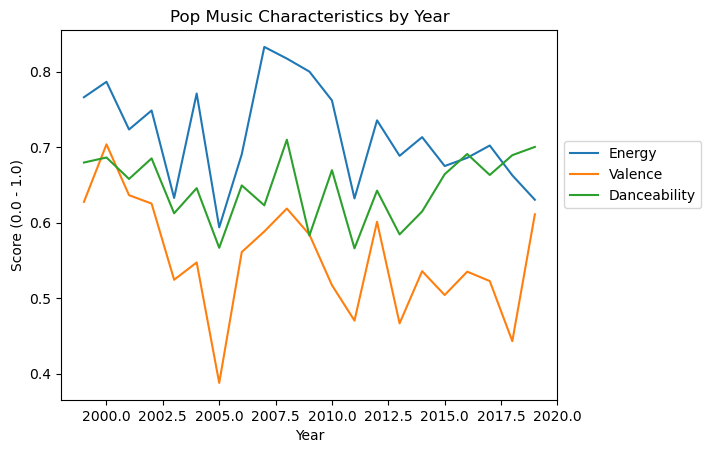

In [591]:
sns.lineplot(x = 'year', y = 'energy', data = pop_df, errorbar = None, label = 'Energy')
sns.lineplot(x = 'year', y = 'valence', data = pop_df, errorbar = None, label = 'Valence')
sns.lineplot(x = 'year', y = 'danceability', data = pop_df, errorbar = None, label = 'Danceability')

plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Score (0.0 - 1.0)')
plt.xlabel('Year')
plt.title('Pop Music Characteristics by Year');

In [501]:
## Energy/Valence/Danceability all had a big dip in 2005. They all very quickly, however, had a resurgence from 2006-2011. Danceability has the most stability over the years. 
## Looks like energy and valence have had a slight downward trend, but with many ups and downs in between. 
## This suggests, perhaps, that music trends come and go- some years we prefer upbeat and energetic songs and other years we prefer slower, more solemn ones. 

In [ ]:
Mean Squared Error: 27.388075916246372
Mean Absolute Error: 4.46461812227009
R-squared: 0.19385537947113918
Intercept: 2019.1732116556511
danceability: 6.747905744933901
energy: -1.0993636739592085
valence: -8.111877572061331
duration_s: -0.04917349097447342
tempo: 0.019163756962010194

Text(0.5, 1.0, 'Average Song Length by Year')

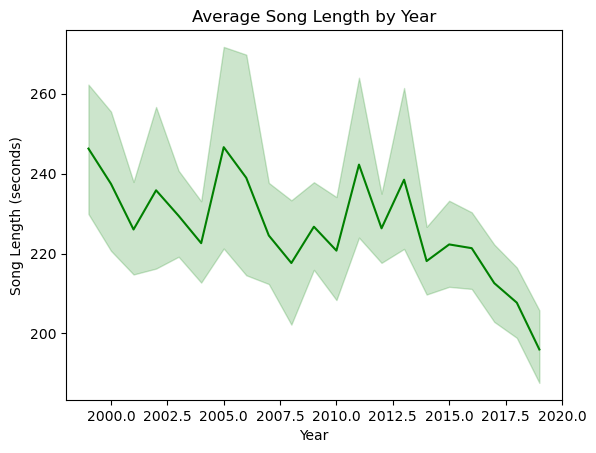

In [592]:
sns.lineplot(x = 'year', y = 'duration_s', data = pop_df, color = 'green')
plt.ylabel('Song Length (seconds)') 
plt.xlabel('Year')
plt.title('Average Song Length by Year')

In [503]:
## A clear trend of average song length's decreasing over the years. 
## Many people theorize that it could be due to the rising popularity of song streaming websites, like Spotify and Apple Music, and the decrease in radio streams. 
## Shorter songs are easier (and literally faster) to generate streams, and thus increasing the artists' profits/monthly listens. 

Text(0.5, 1.0, 'Average Tempo by Year')

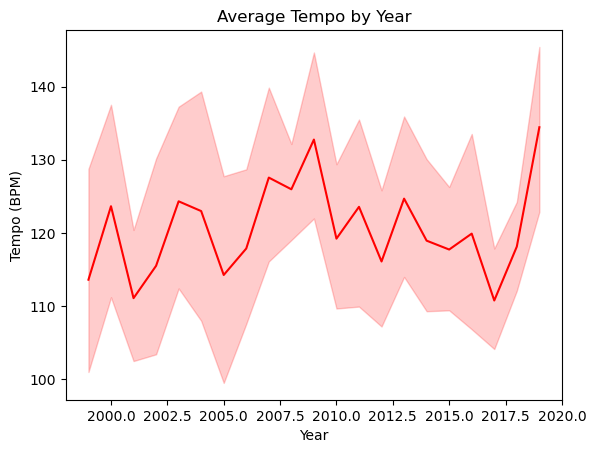

In [593]:
sns.lineplot(x = 'year', y = 'tempo', data = pop_df, color = 'red')
plt.ylabel('Tempo (BPM)') 
plt.xlabel('Year')
plt.title('Average Tempo by Year')

In [554]:
## It looks like there has been an increase in the average tempo over the years. Similar to the first figure, there are many highs and lows, 
## implying a pendulumn-like trend in song tempos. This aligns with our findings of an increase in danceability over the years.

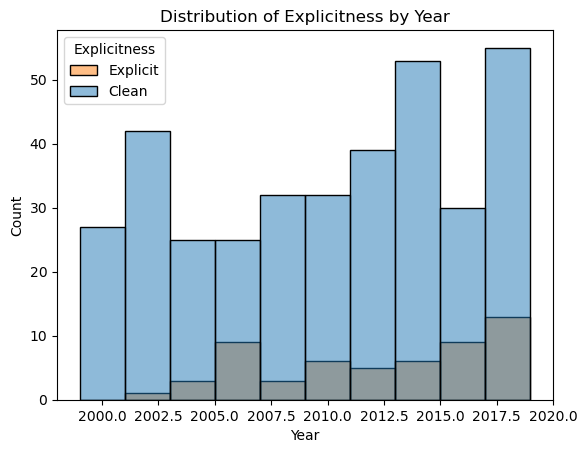

In [594]:
legend_labels = {True: 'Explicit', False: 'Clean'}

sns.histplot(x='year', hue='explicit', data=pop_df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Explicitness by Year')

# Create custom legend
plt.legend(title='Explicitness', labels=[legend_labels[True], legend_labels[False]])


In [505]:
## Songs seem to be increasing in explicitness. 

In [341]:
X_new = [[0.695, 0.762, 0.553, 215.28, 120.042]]  # Example values for danceability, energy, valence, duration, tempo
predicted_year = model.predict(X_new)
print("Predicted Release Year for New Song:", predicted_year[0])


Predicted Release Year for New Song: 2010.4758636088195


/Users/ruthcarter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [560]:

X = pop_df[['year']]  # Independent variable
y = pop_df[['danceability', 'energy', 'valence', 'duration_s', 'tempo']]  # Dependent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the dependent variables on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


for variable, coefficient in zip(y.columns, model.intercept_):
    print(f"{variable} y-int: {coefficient}")

for variable, coefficient in zip(y.columns, model.coef_):
    print(f"{variable}: {coefficient}")


Mean Squared Error: 334.1059534244637
Mean Absolute Error: 8.906518757686142
R-squared: -0.02736584844209995
danceability y-int: -1.3239416261851025
energy y-int: 9.209635673296637
valence y-int: 7.368591486115355
duration_s y-int: 3199.259691368515
tempo y-int: -163.94707047218537
danceability: [0.0009772]
energy: [-0.00422858]
valence: [-0.00339377]
duration_s: [-1.47982344]
tempo: [0.14146664]


### Question 2: What characteristics determine a popular song?

<Axes: xlabel='popularity', ylabel='Count'>

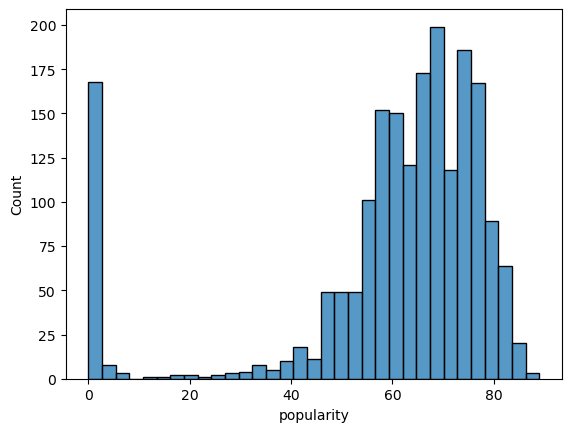

In [474]:
sns.histplot(x='popularity', data = df)

In [596]:
### Its super weird to have so many 0 values. It must be a data entry error, so I will remove all 0 popularity value rows

In [548]:
sorted_values = df.sort_values('popularity')[:179]
popular_df = df.drop(sorted_values.index)

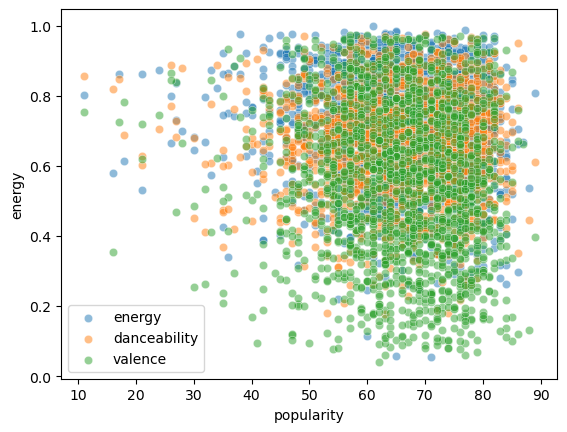

In [574]:
sns.scatterplot(x = 'popularity', y= 'energy', data = popular_df, alpha = .5, label = 'energy')
sns.scatterplot(x = 'popularity', y= 'danceability', data = popular_df, alpha = .5, label = 'danceability')
sns.scatterplot(x = 'popularity', y= 'valence', data = popular_df, alpha = .5, label = 'valence')

plt.legend()

In [527]:
cor_mat_df = df[['danceability', 'valence', 'energy', 'year', 'tempo', 'popularity']]

              danceability   valence    energy      year     tempo  popularity
danceability      1.000000  0.403746 -0.103179  0.034509 -0.167254    0.000443
valence           0.403746  1.000000  0.333088 -0.209182 -0.023014   -0.011589
energy           -0.103179  0.333088  1.000000 -0.113795  0.150806   -0.012853
year              0.034509 -0.209182 -0.113795  1.000000  0.075937   -0.005724
tempo            -0.167254 -0.023014  0.150806  0.075937  1.000000    0.011369
popularity        0.000443 -0.011589 -0.012853 -0.005724  0.011369    1.000000


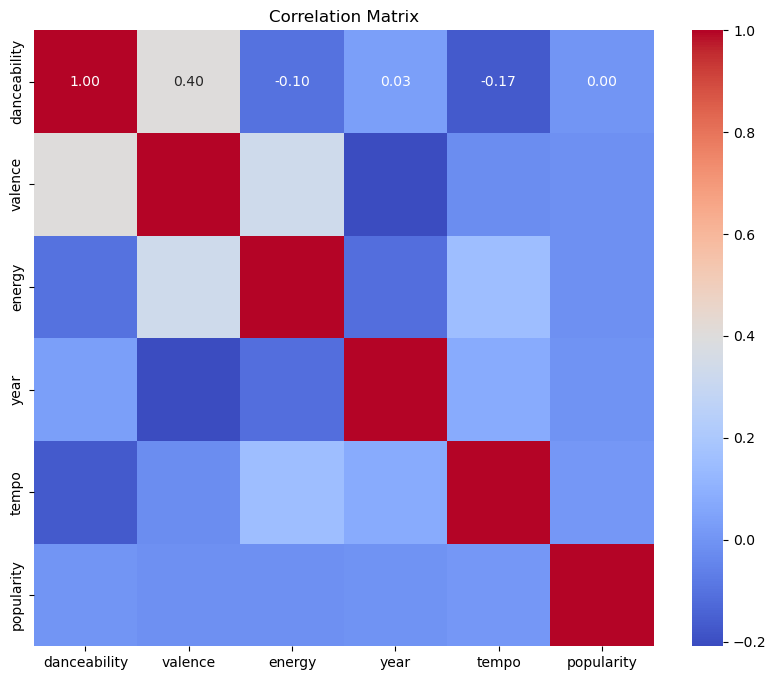

In [553]:

# Calculate the correlation matrix
correlation_matrix = cor_mat_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Generate heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [576]:
## No notable correlations with popularity :(

### Question 2b: What artist has the widest popularity IQR and how do their song characteristics change as their music gets more popular? 

In [679]:
popular_df.loc[df['artist'] == '*NSYNC']


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,-4.806,0.0408,0.001040,0.0845,0.879,172.656,pop,200.56
86,*NSYNC,It's Gonna Be Me,191040,False,2000,60,0.644,0.874,-4.666,0.0459,0.000002,0.0584,0.882,165.090,pop,191.04
198,*NSYNC,Gone,292000,False,2001,45,0.699,0.403,-8.564,0.4210,0.000000,0.1260,0.500,113.922,pop,292.00
283,*NSYNC,Girlfriend,253600,False,2001,50,0.745,0.807,-5.191,0.0887,0.000015,0.0283,0.858,93.967,pop,253.60


In [654]:
popular_df.sort_values('popularity', ascending = False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.8070,-2.810,0.049500,0.017700,0.1010,0.3980,124.053,"rock, pop",240.400
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.5370,-8.532,0.695000,0.000017,0.0944,0.1310,122.769,pop,244.360
201,Eminem,Without Me,290320,True,2002,87,0.908,0.6690,-2.827,0.002860,0.000000,0.2370,0.6620,112.238,hip hop,290.320
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.2960,-10.109,0.934000,0.000000,0.0950,0.1200,115.284,"pop, Dance/Electronic",200.185
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.7050,-5.279,0.037100,0.000019,0.0943,0.6720,101.003,"pop, R&B, Dance/Electronic",196.520
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.6610,-4.244,0.030200,0.000000,0.0454,0.7600,104.504,hip hop,284.200
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.7620,-3.497,0.192000,0.002440,0.0863,0.5530,120.042,hip hop,215.280
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.8350,-5.298,0.016600,0.000000,0.2490,0.6540,125.983,"pop, Dance/Electronic",176.658
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.5210,-9.461,0.067800,0.149000,0.1230,0.3370,85.012,"rock, pop",260.173
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.4480,-6.312,0.163000,0.000000,0.1060,0.1680,95.050,pop,263.400


In [671]:
popularity_range = popular_df.groupby('artist')['popularity'].apply(lambda x: x.max() - x.min())

# Find the artist with the largest range in popularity
artist_with_largest_range = popularity_range.sort_values(ascending = False).head(20)

# Print the artist with the largest range
artist_with_largest_range

artist
Daddy Yankee        68
Calvin Harris       60
The Wanted          59
Usher               55
Akon                53
Mary J. Blige       44
Duke Dumont         40
Eminem              39
Snoop Dogg          38
3OH!3               38
Kanye West          37
Mark Ronson         36
No Doubt            36
Robbie Williams     35
David Guetta        34
Enrique Iglesias    33
Avicii              32
Fat Joe             32
will.i.am           32
Beyoncé             31
Name: popularity, dtype: int64

In [672]:
calv_df =  df[(df['artist'] == "Calvin Harris")]

In [680]:
nsync_df = df[(df['artist'] == "*NSYNC")]

<Axes: xlabel='popularity'>

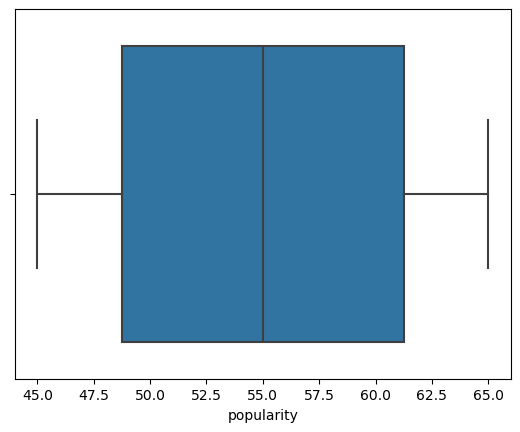

In [681]:
sns.boxplot(x = 'popularity', data = nsync_df)

Text(0, 0.5, 'Score (0.0-1.0)')

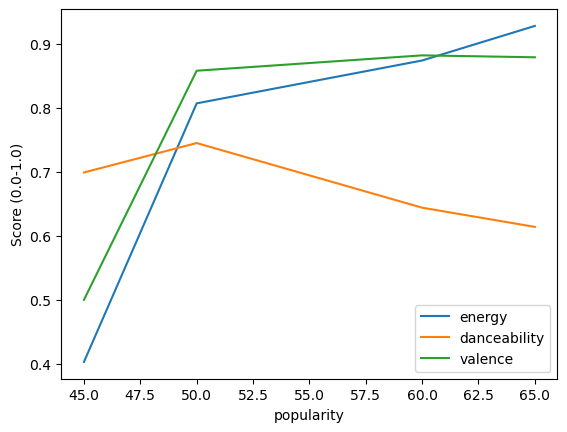

In [690]:
sns.lineplot(x = 'popularity', y = 'energy', data = nsync_df, label = 'energy')
sns.lineplot(x = 'popularity', y = 'danceability', data = nsync_df, label = 'danceability')
sns.lineplot(x = 'popularity', y = 'valence', data = nsync_df, label = 'valence')

plt.ylabel('Score (0.0-1.0)')

Text(0.5, 1.0, 'Song Length by popularity')

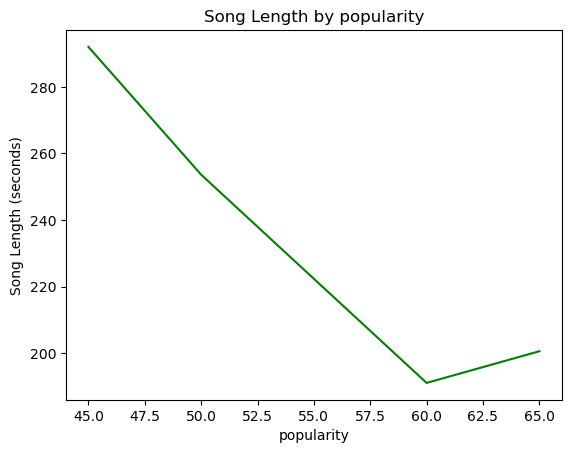

In [697]:
sns.lineplot(x = 'popularity', y = 'duration_s', data = nsync_df, color = 'green')
plt.ylabel('Song Length (seconds)') 
plt.xlabel('popularity')
plt.title('Song Length by popularity')

Text(0.5, 1.0, 'Tempo by Popularity')

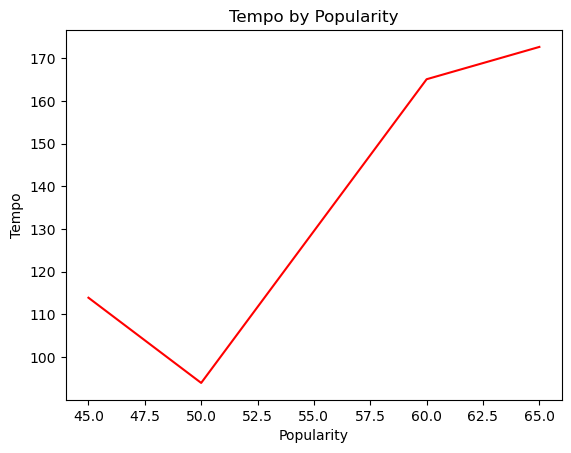

In [696]:
sns.lineplot(x = 'popularity', y = 'tempo', data = nsync_df, color = 'red')
plt.ylabel('Tempo') 
plt.xlabel('Popularity')
plt.title('Tempo by Popularity')

In [691]:

X = nsync_df[['popularity']]  # Independent variable
y = nsync_df[['danceability', 'energy', 'valence', 'duration_s', 'tempo']]  # Dependent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the dependent variables on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


for variable, coefficient in zip(y.columns, model.intercept_):
    print(f"{variable} y-int: {coefficient}")

for variable, coefficient in zip(y.columns, model.coef_):
    print(f"{variable}: {coefficient}")


Mean Squared Error: 211.48590337278173
Mean Absolute Error: 8.79258461538463
R-squared: nan
danceability y-int: 0.9678461538461536
energy y-int: -0.46353846153846157
valence y-int: -0.04899999999999971
duration_s y-int: 479.8092307692307
tempo y-int: -58.197000000000045
danceability: [-0.00528462]
energy: [0.02205385]
valence: [0.0149]
duration_s: [-4.33292308]
tempo: [3.4696]


/Users/ruthcarter/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [694]:
def calculate_iqr(x):
    q3, q1 = np.percentile(x, [75 ,25])
    return q3 - q1

popularity_iqr = df.groupby('artist')['popularity'].apply(calculate_iqr)

artist_with_largest_iqr = popularity_iqr.head()

print(artist_with_largest_iqr)

artist
*NSYNC       12.5
112           3.0
2 Chainz      1.0
21 Savage     2.0
2Pac          5.5
Name: popularity, dtype: float64


### Question 3: Differences between Taylor Swift and Kanye West songs

In [607]:
tay_kan_df = df[(df['artist'] == "Taylor Swift") | (df['artist'] == "Kanye West")]
tay_kan_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
465,Kanye West,Jesus Walks,193733,True,2004,73,0.637,0.834,-4.686,0.614000,0.000000,0.3170,0.715,87.312,hip hop,193.733
476,Kanye West,Through The Wire,221226,True,2004,76,0.571,0.739,-6.110,0.008650,0.000005,0.1580,0.660,83.089,hip hop,221.226
484,Kanye West,All Falls Down,223506,True,2004,80,0.657,0.734,-4.832,0.149000,0.000000,0.1390,0.434,91.030,hip hop,223.506
502,Kanye West,Gold Digger,207626,True,2005,78,0.629,0.696,-5.572,0.019500,0.000000,0.0554,0.623,93.034,hip hop,207.626
549,Kanye West,Diamonds From Sierra Leone - Remix,233400,True,2005,61,0.672,0.814,-3.768,0.258000,0.000000,0.1640,0.379,97.043,hip hop,233.400
649,Kanye West,Touch The Sky,236600,True,2005,73,0.552,0.846,-4.912,0.011400,0.000000,0.3090,0.554,98.560,hip hop,236.600
719,Kanye West,Stronger,311866,True,2007,54,0.617,0.717,-7.858,0.005640,0.000000,0.4080,0.490,103.992,hip hop,311.866
728,Kanye West,Can't Tell Me Nothing,271600,True,2007,47,0.596,0.620,-6.133,0.012200,0.000000,0.8200,0.102,80.029,hip hop,271.600
816,Kanye West,Flashing Lights,237506,True,2007,52,0.639,0.628,-7.578,0.038100,0.000000,0.3860,0.430,90.482,hip hop,237.506
848,Kanye West,Homecoming,203493,True,2007,47,0.667,0.747,-7.059,0.337000,0.000000,0.1150,0.918,86.917,hip hop,203.493


In [609]:
#drop kanye outlier (data entry error)
tay_kan_df.drop(1334, inplace = True)

/var/folders/c2/vqcf1d1j7k76wnxgnj0h0j680000gn/T/ipykernel_47456/2007119474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tay_kan_df.drop(1334, inplace = True)


Text(0.5, 1.0, 'Swift vs Kanye Popularity')

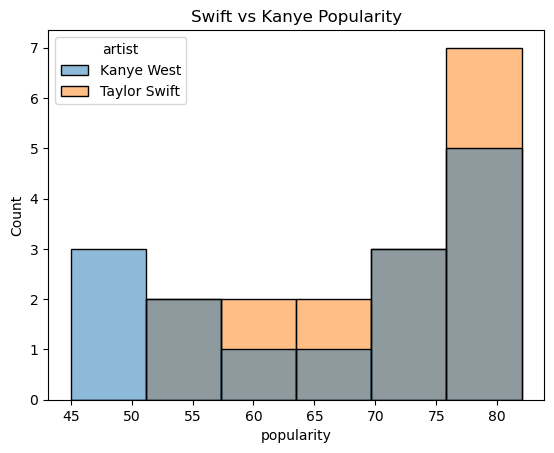

In [613]:
#Popularity 
sns.histplot(x = 'popularity', hue = 'artist', data = tay_kan_df)
plt.title('Swift vs Kanye Popularity') 

<Axes: xlabel='artist', ylabel='energy'>

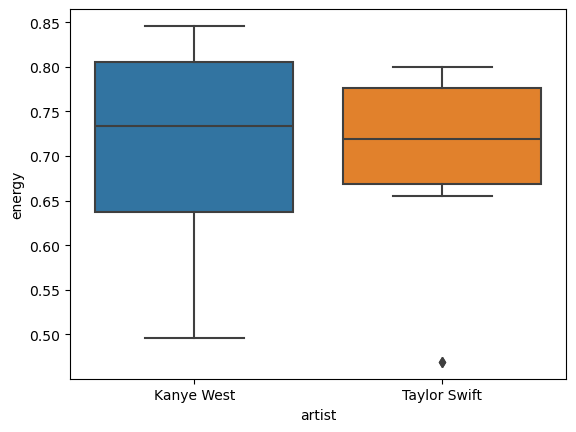

In [629]:
sns.boxplot(x='artist', y='energy', data=tay_kan_df)

<Axes: xlabel='artist', ylabel='danceability'>

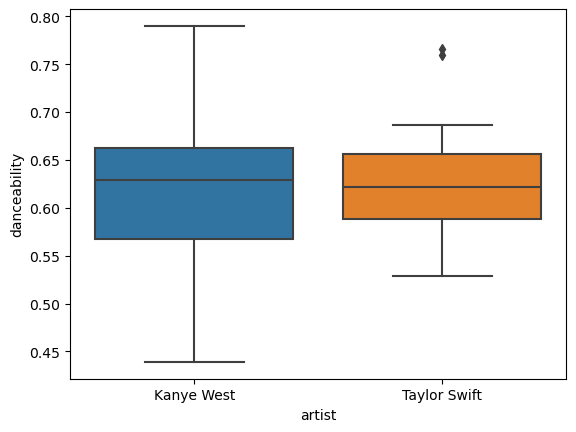

In [630]:
sns.boxplot(x='artist', y='danceability', data=tay_kan_df)

<Axes: xlabel='artist', ylabel='tempo'>

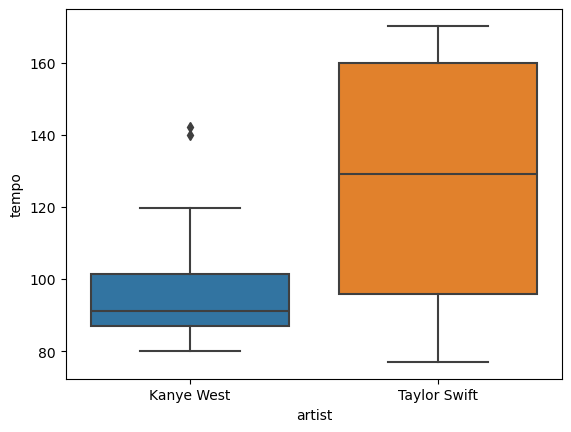

In [631]:
sns.boxplot(x='artist', y='tempo', data=tay_kan_df)

<Axes: xlabel='artist', ylabel='popularity'>

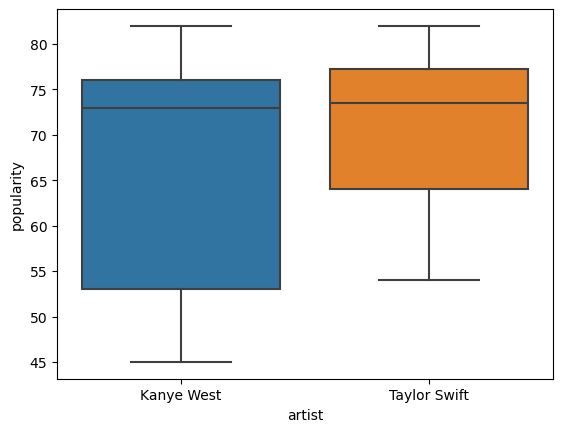

In [633]:
sns.boxplot(x='artist', y='popularity', data=tay_kan_df)